## **Import Necessary Libraries**

In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


In [3]:
import kagglehub


!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
import os
import kaggle

# Define Kaggle dataset path and local storage path
dataset_name = "landrykezebou/vcor-vehicle-color-recognition-dataset"
dataset_path = "/content/dataset"

# Create dataset directory
os.makedirs(dataset_path, exist_ok=True)

# Download dataset
!kaggle datasets download -d {dataset_name} -p {dataset_path}

Dataset URL: https://www.kaggle.com/datasets/landrykezebou/vcor-vehicle-color-recognition-dataset
License(s): copyright-authors


In [5]:
# Unzip dataset
!unzip {dataset_path}/*.zip -d {dataset_path}

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/train/orange/e4f9205ccc.jpg  
  inflating: /content/dataset/train/orange/e532c363be.jpg  
  inflating: /content/dataset/train/orange/e5d2677717.jpg  
  inflating: /content/dataset/train/orange/e6bbd5bd7c.jpg  
  inflating: /content/dataset/train/orange/e6c8c2eb92.jpg  
  inflating: /content/dataset/train/orange/e734cc9748.jpg  
  inflating: /content/dataset/train/orange/e75ad9cbe4.jpg  
  inflating: /content/dataset/train/orange/e7793a0aef.jpg  
  inflating: /content/dataset/train/orange/e8005c8ac5.jpg  
  inflating: /content/dataset/train/orange/e85a7f559d.jpg  
  inflating: /content/dataset/train/orange/e865d8da86.jpg  
  inflating: /content/dataset/train/orange/e8fd7563ed.jpg  
  inflating: /content/dataset/train/orange/ea48d0930b.jpg  
  inflating: /content/dataset/train/orange/ea71c13a20.jpg  
  inflating: /content/dataset/train/orange/ea75ce4328.jpg  
  inflating: /content/dataset/train/orange/eacc03

In [14]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array,img_to_array
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input as mobilenet_preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import zipfile

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
import seaborn as sns
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


In [15]:
# Define Image Size and Batch Size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
dataset_train_path = os.path.join(dataset_path, 'train')
dataset_val_path = os.path.join(dataset_path, 'val')
dataset_test_path = os.path.join(dataset_path, 'test')

In [17]:
train_generator = train_datagen.flow_from_directory(
    dataset_train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    dataset_val_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 7267 images belonging to 15 classes.
Found 1550 images belonging to 15 classes.


In [28]:
## **Step 4: Build Custom CNN Model**

def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(2, 2),
        BatchNormalization(),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(len(train_generator.class_indices), activation='softmax')  # Output Layer
    ])
    return model

In [29]:
model = build_model()



In [30]:
# Compile Model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [31]:

# Model Summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 111, 111, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 15)                  │             975 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,632,207 (21.49 MB)

 Trainable params: 5,632,143 (21.48 MB)

 Non-trainable params: 64 (256.00 B)

In [32]:
## **Step 5: Train Model**

epochs = 20
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)

Epoch 1/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 111s 465ms/step - accuracy: 0.2374 - loss: 2.3303 - val_accuracy: 0.4871 - val_loss: 2.2257
Epoch 2/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 98s 431ms/step - accuracy: 0.4188 - loss: 1.7224 - val_accuracy: 0.6652 - val_loss: 1.3309
Epoch 3/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 142s 432ms/step - accuracy: 0.5239 - loss: 1.4620 - val_accuracy: 0.7058 - val_loss: 1.0191
Epoch 4/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 99s 434ms/step - accuracy: 0.5695 - loss: 1.3407 - val_accuracy: 0.7394 - val_loss: 0.8836
Epoch 5/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 98s 430ms/step - accuracy: 0.6118 - loss: 1.2269 - val_accuracy: 0.7594 - val_loss: 0.8331
Epoch 6/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 97s 427ms/step - accuracy: 0.6381 - loss: 1.1418 - val_accuracy: 0.7542 - val_loss: 0.7718
Epoch 7/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 98s 428ms/step - accuracy: 0.6580 - loss: 1.0963 - val_accuracy: 0.7768 - val_loss: 0.7293
Epoch 8/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 99s 432ms/step - accuracy: 0.6644 - loss:

In [35]:
model.save("car_color_custom_model.h5")  # HDF5 format
model.save("car_color_custom_model.keras")  # TensorFlow SavedModel format
#model.save_weights("car_color_custom_model_weights.h5")  # Weights only

In [37]:
model.save_weights("car_color_custom_model.weights.h5")  # Correct format


In [38]:
!pip install -q tf2onnx
import tf2onnx
onnx_model_path = "car_color_custom_model.onnx"
spec = (tf.TensorSpec((None, 224, 224, 3), tf.float32),)
onxx_model, _ = tf2onnx.convert.from_keras(model, input_signature=spec, opset=13)
tf2onnx.utils.save_model(onxx_model, onnx_model_path)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 15.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.16.1 requires protobuf<6.0.0dev,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.


AttributeError: 'Sequential' object has no attribute 'output_names'

In [36]:
# Save model using pickle
import pickle
pickle_model_path = "car_color_custom_model.pkl"
with open(pickle_model_path, "wb") as f:
    pickle.dump(model, f)

In [39]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

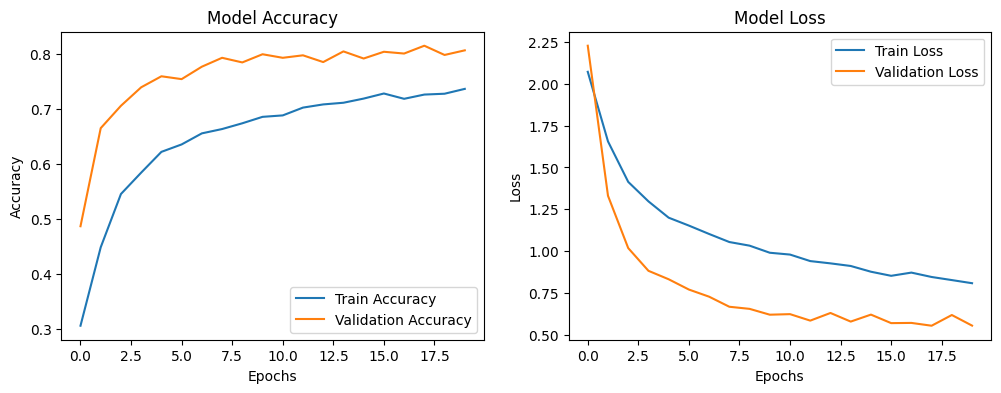

In [40]:
plot_training_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━

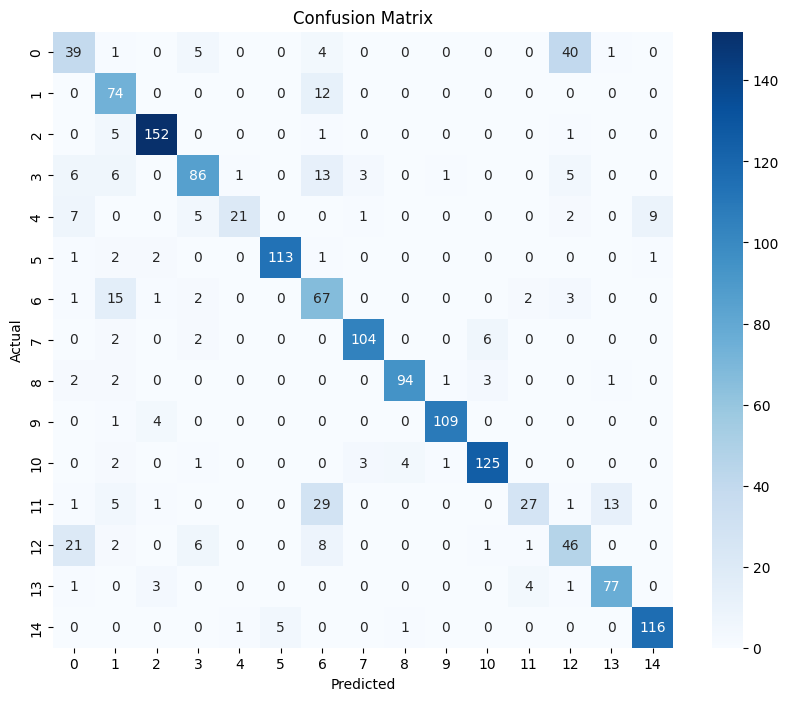

              precision    recall  f1-score   support

       beige       0.49      0.43      0.46        90
       black       0.63      0.86      0.73        86
        blue       0.93      0.96      0.94       159
       brown       0.80      0.71      0.75       121
        gold       0.91      0.47      0.62        45
       green       0.96      0.94      0.95       120
        grey       0.50      0.74      0.59        91
      orange       0.94      0.91      0.92       114
        pink       0.95      0.91      0.93       103
      purple       0.97      0.96      0.96       114
         red       0.93      0.92      0.92       136
      silver       0.79      0.35      0.49        77
         tan       0.46      0.54      0.50        85
       white       0.84      0.90      0.87        86
      yellow       0.92      0.94      0.93       123

    accuracy                           0.81      1550
   macro avg       0.80      0.77      0.77      1550
weighted avg       0.82   

In [42]:
# Confusion Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix

y_true = []
y_pred = []

for i in range(len(val_generator)):
    images, labels = val_generator[i]
    predictions = model.predict(images)
    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(predictions, axis=1))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=list(train_generator.class_indices.keys())))


In [43]:
## **Step 8: Test Model with New Images**

def predict_car_color(image_path, model, class_labels):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, IMG_SIZE)
    img_array = np.expand_dims(img, axis=0) / 255.0

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]

    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()


In [44]:
# Load the trained model
loaded_model = tf.keras.models.load_model("car_color_custom_model.h5")
class_labels = list(train_generator.class_indices.keys())

# Example Usage
predict_car_color("/content/dataset/test/blue/sample_image.jpg", loaded_model, class_labels)

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
